In [1]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [2]:
import pandas as pd
import numpy as np
import time
import datetime

In [3]:

apps = pd.read_csv('user_apps_statistics.csv', index_col = 'user_id')
purch = pd.read_csv('user_purchase_events.csv', index_col = 'user_id')
user = pd.read_csv('user_table.csv', index_col = 'user_id')

apps.drop('Unnamed: 0', axis=1, inplace=True)
purch.drop('Unnamed: 0', axis=1, inplace=True)
user.drop('Unnamed: 0', axis=1, inplace=True)

# modified purch table
# purch.amount_spend.replace({'casual': 3, 'rookie': 1, 'player': 5, 'whale': 10}, inplace=True)
purch.amount_spend.replace({'casual': 1, 'rookie': 1, 'player': 1, 'whale': 1}, inplace=True)
purch.drop('date', axis=1, inplace=True)
# purch = pd.DataFrame(purch.groupby('user_id')['amount_spend'].sum())
purch = pd.DataFrame(purch.groupby('user_id')['amount_spend'].count()).assign(amount_spend=1)


mer = apps.join(purch,on = 'user_id')
print(f"""
    apps: {apps.columns.values}
    purch: {purch.columns.values}
    user: {user.columns.values}
    mer: {mer.columns.values}
    """)


    apps: ['n_topGrossingApps' 'nTotal_Apps' 'n_shoppingApps']
    purch: ['amount_spend']
    user: ['os_version' 'installed_Mistplay' 'gender' 'ref'
 'installed_Mistplay_timezone' 'game_install_date' 'game_install_timezone'
 'source_id' 'country_id' 'bin_age' 'device_id']
    mer: ['n_topGrossingApps' 'nTotal_Apps' 'n_shoppingApps' 'amount_spend']
    


In [468]:
apps2 = pd.read_csv('user_apps_statistics.csv', index_col = 'user_id')
purch2 = pd.read_csv('user_purchase_events.csv', index_col = 'user_id')
user2 = pd.read_csv('user_table.csv', index_col = 'user_id')
apps2.drop('Unnamed: 0', axis=1, inplace=True)
purch2.drop('Unnamed: 0', axis=1, inplace=True)
purch2.amount_spend.replace({'casual': 3, 'rookie': 1, 'player': 5, 'whale': 10}, inplace=True)
user2.drop('Unnamed: 0', axis=1, inplace=True)

In [469]:
_ = purch2.loc[:,['date','amount_spend']].join(user2.loc[:,['game_install_date','bin_age']], how='inner')

_ = _[_.index.duplicated() == False]

In [470]:
_.loc[:,'date']  = pd.to_datetime(_['date'])
_.loc[:,'game_install_date']  = pd.to_datetime(_['game_install_date'])

In [471]:
_['time_delta'] = (_['date'] - _['game_install_date']).dt.days

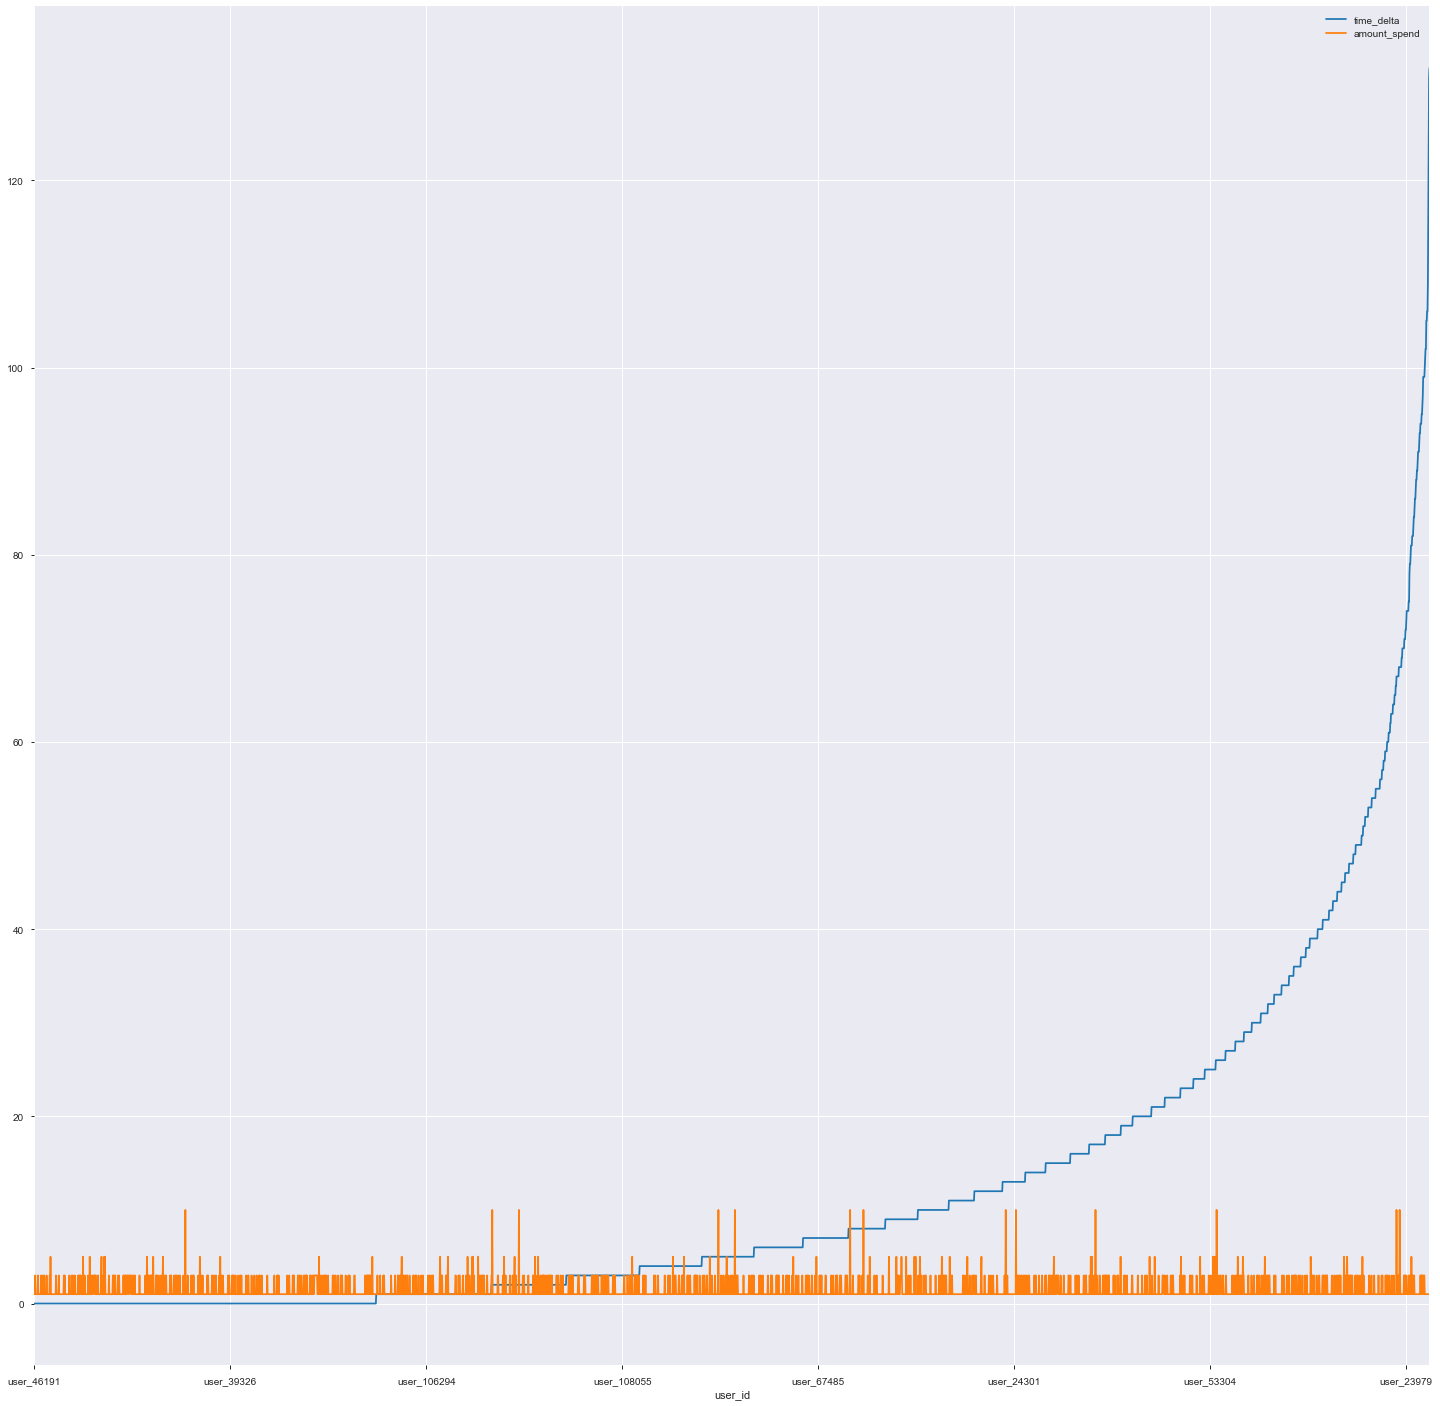

In [525]:
_.loc[:,['time_delta', 'amount_spend']].sort_values(by="time_delta").plot()

In [538]:
_.loc[:,'time_delta'].value_counts().to_csv('bar_days.csv')

/home/jyu/miniconda3/envs/codeham/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [ ]:
df.columns.va

In [240]:
# purch.amount_spend.value_counts().plot(kind='bar')
df.amount_spend.astype(bool).sum(axis=0)

2943

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
df = mer.join(user,how='inner')
df.drop('ref',axis=1, inplace=True)

df.amount_spend.fillna(0, inplace=True)
df.bin_age.fillna(4, inplace=True)
df.gender.fillna(0.5, inplace=True)
df.source_id.fillna('_0.5', inplace=True)
df.country_id.fillna('_0.5', inplace=True)
df.os_version.fillna('8.', inplace=True)
df.n_topGrossingApps.fillna('4.55',inplace=True)
df.nTotal_Apps.fillna('95.14',inplace=True)
df.n_shoppingApps.fillna('5.05',inplace=True)


# df.amount_spend.replace({'casual': 2, 'rookie': 1, 'player': 3, 'whale': 4}, inplace=True)

# binary

df.bin_age.replace({'(13.0, 18.0]': 1, '(18.0, 22.0]': 2, '(22.0, 25.0]': 3,\
                    '(25.0, 30.0]': 4,'(30.0, 35.0]':5,'(35.0, 40.0]':6,\
                        '(40.0, 45.0]':7,'(45.0, 55.0]':8,'(55.0, 65.0]':9,'(65.0, 200.0]':10}, inplace=True)
list(df.columns.values)

['n_topGrossingApps',
 'nTotal_Apps',
 'n_shoppingApps',
 'amount_spend',
 'os_version',
 'installed_Mistplay',
 'gender',
 'installed_Mistplay_timezone',
 'game_install_date',
 'game_install_timezone',
 'source_id',
 'country_id',
 'bin_age',
 'device_id']

In [48]:
%matplotlib inline
df = df.loc[(df.gender != 2.0) & (df.gender != 0.5)]
df0 = df.loc[df.amount_spend == 0]
df1 = df.loc[df.amount_spend == 1]
df1.groupby(['gender', 'bin_age'])['n_shoppingApps'].mean()
df0.groupby(['gender', 'bin_age'])['n_shoppingApps'].mean()

gender  bin_age      
0.0     (13.0, 18.0]     7.666667
        (18.0, 22.0]     5.076923
        (22.0, 25.0]     4.902439
        (25.0, 30.0]     4.475362
        (30.0, 35.0]     4.514512
        (35.0, 40.0]     5.138889
        (40.0, 45.0]     5.425339
        (45.0, 55.0]     4.792857
        (55.0, 65.0]     4.361111
        (65.0, 200.0]    2.750000
1.0     (13.0, 18.0]     3.000000
        (18.0, 22.0]     8.733333
        (22.0, 25.0]     6.400000
        (25.0, 30.0]     6.835249
        (30.0, 35.0]     7.296820
        (35.0, 40.0]     7.462963
        (40.0, 45.0]     6.155556
        (45.0, 55.0]     6.357759
        (55.0, 65.0]     6.631579
        (65.0, 200.0]    3.444444
Name: n_shoppingApps, dtype: float64

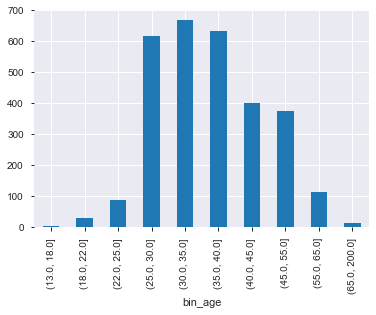

In [442]:
import matplotlib.pyplot as plt
__ = mer.join(user,how='inner')
__.amount_spend.fillna(0, inplace=True)
__.groupby('bin_age')['amount_spend'].sum().plot(kind='bar')

In [446]:
(__.groupby('bin_age')['amount_spend'].sum()/__.groupby('bin_age')['amount_spend'].count()).to_csv('ageDolphins')

/home/jyu/miniconda3/envs/codeham/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


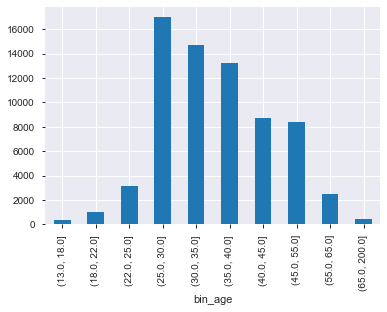

In [441]:
__.groupby('bin_age')['amount_spend'].count().plot(kind='bar')
plt.show()

In [24]:

df.groupby(['gender', 'bin_age'])['nTotal_Apps'].mean()

gender  bin_age
0.0     1           92.090909
        2          106.668203
        3           92.902192
        4           90.589057
        5           94.366755
        6           95.352566
        7           95.655351
        8           92.534055
        9           83.611702
        10          79.226562
0.5     2           92.000000
        3           46.500000
        4          120.716667
        5          123.333333
        6          114.125000
        7          142.400000
        8           67.285714
        9          111.000000
1.0     1           96.994118
        2          111.698324
        3          105.741093
        4          104.649492
        5          106.499759
        6          104.375794
        7          101.751670
        8           96.769260
        9           90.201878
        10          85.476821
2.0     1           86.500000
        2           90.484848
        3           99.681159
        4           93.687243
        5           86.4

In [6]:
# df.country_id = df.country_id.str.slice(start = 8)
df['c_id'] = df['country_id'].apply(lambda x: x.split('_')[1])
df['os_v'] = df['os_version'].apply(lambda x: x.split('.')[0])
df['s_id'] = df['source_id'].apply(lambda x: x.split('_')[1])

In [7]:
cols = ['n_topGrossingApps', 'nTotal_Apps', 'n_shoppingApps','bin_age','c_id','os_v','gender']
df_X = df[cols]
df_Y = df['amount_spend']

X = df_X.reset_index(drop=True).to_numpy()
Y = df_Y.reset_index(drop=True).to_numpy()

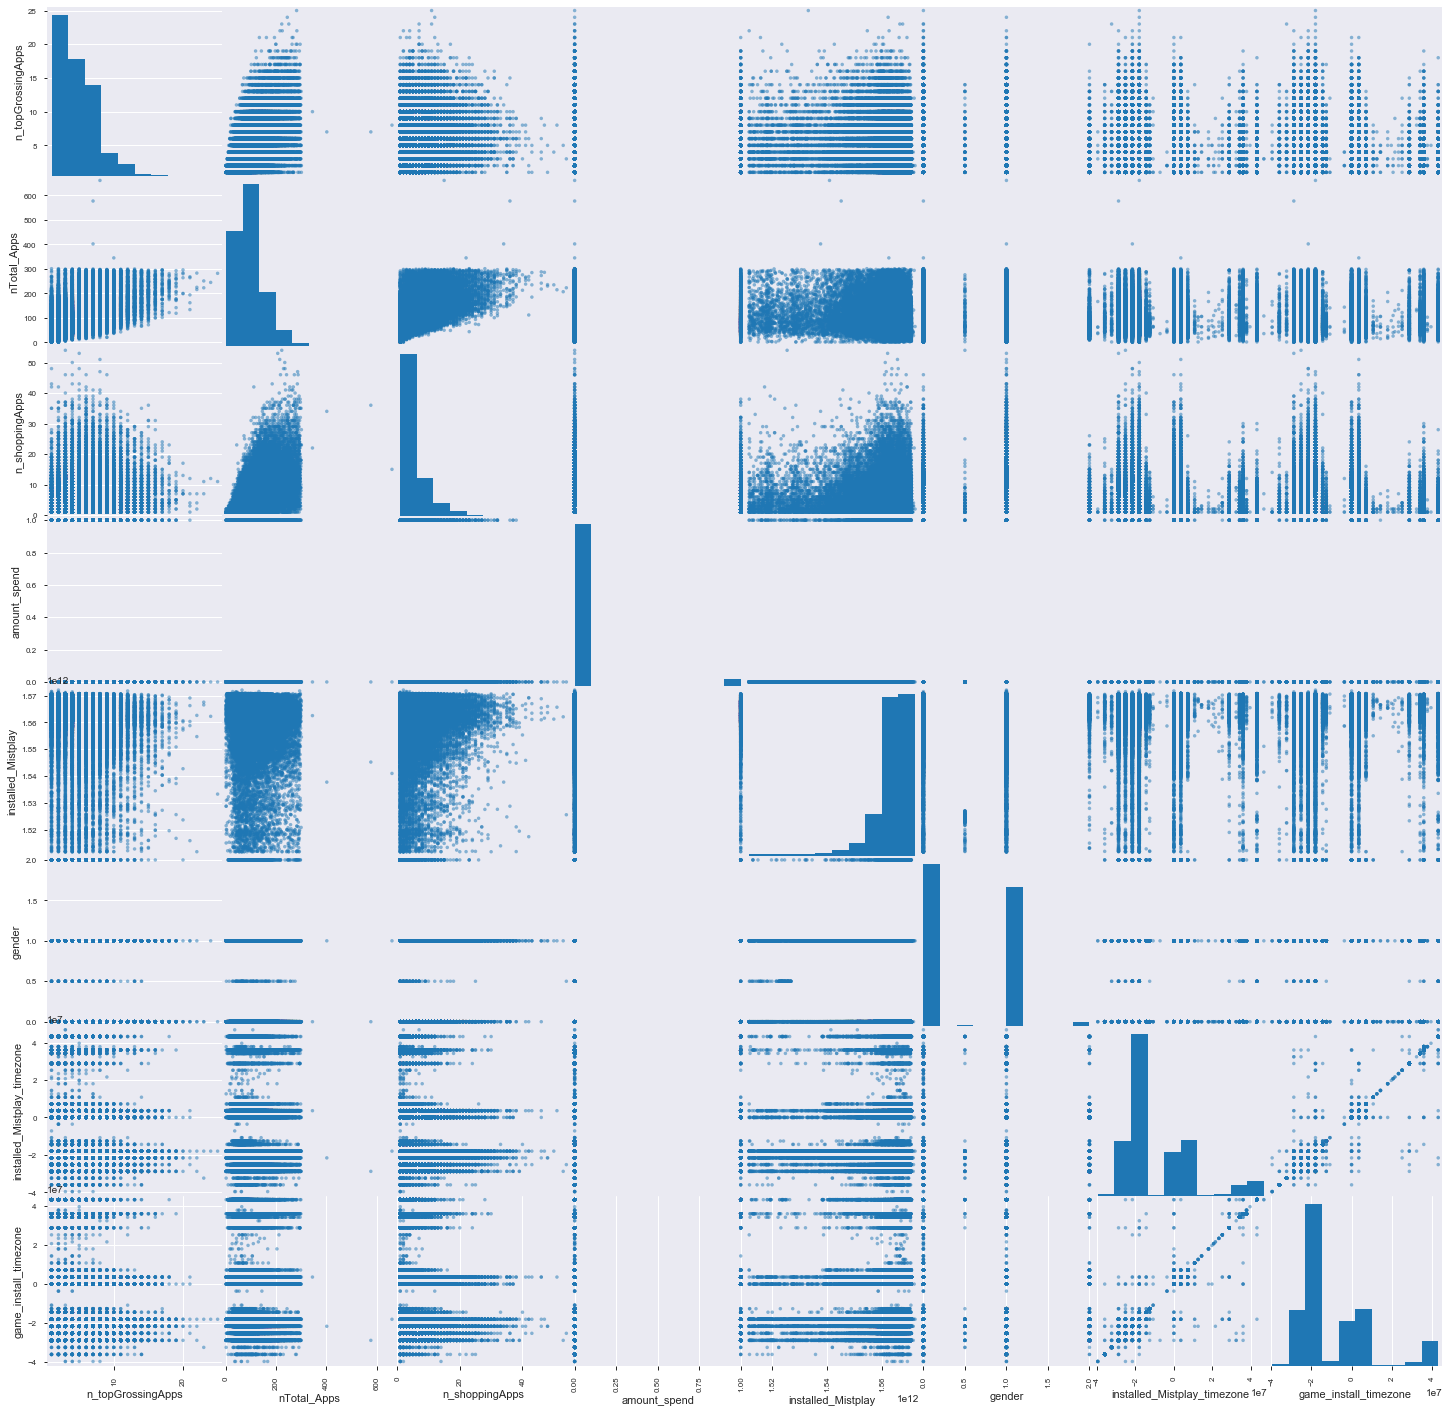

In [519]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (25,25)
pd.plotting.scatter_matrix(df)
plt.show()

In [8]:
# split data
trainX,validX,trainY,validY = train_test_split(X,Y,test_size = 0.2)

In [451]:
sm = SMOTE(random_state=42,sampling_strategy=0.45)
X_res, y_res = sm.fit_resample(trainX, trainY)

In [9]:
from imblearn.under_sampling import RandomUnderSampler
cc = RandomUnderSampler(random_state=0,sampling_strategy=0.2)
X_res, y_res = cc.fit_resample(trainX, trainY)

In [10]:
X_res.shape

(14142, 7)

In [14]:
np.save("X_res",X_res)
np.save("Y_res",y_res)
np.save("ValidX",validX)
np.save("ValidY",validY)

In [11]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=20)
rf.fit(trainX, trainY)
pred=rf.predict(validX)

In [453]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
clf.fit(X_res, y_res)
pred=clf.predict(validX)

/home/jyu/miniconda3/envs/codeham/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [324]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(trainX, trainY)


In [326]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_res, y_res)
pred=clf.predict(validX)

In [13]:
binary = np.round(pred)
Y_Valid = [float(i) for i in validY]
from sklearn.metrics import confusion_matrix,classification_report, f1_score
print(confusion_matrix(Y_Valid,binary))
print(classification_report(Y_Valid, binary))

[[13263    73]
 [  568    18]]
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98     13336
         1.0       0.20      0.03      0.05       586

    accuracy                           0.95     13922
   macro avg       0.58      0.51      0.51     13922
weighted avg       0.93      0.95      0.94     13922



In [500]:
print(confusion_matrix(Y_Valid,binary))
report = classification_report(Y_Valid, binary, output_dict=True)

[[13213   113]
 [  578    18]]


In [509]:
pd.DataFrame(report).T.to_csv('classfication_report.csv')

In [467]:
import pickle
filename = 'finalized_rf.sav'
pickle.dump(rf, open(filename, 'wb'))

In [510]:
pd.DataFrame(confusion_matrix(Y_Valid,binary)).to_csv('confusion_matrix.csv')